# EDA — Prédiction du Churn Client (désabonnement)– Projet Data Science
**Auteur :** MACHAY Fatima 

**Date :** 2025-10-06  

**Objectif :** Développer un pipeline complet de Machine Learning supervisé permettant de prédire le désabonnement des clients (churn) au sein d’une entreprise de télécommunications, dans le but de mieux cibler les actions de fidélisation et de réduire la perte de clientèle.
Parallèlement, analyser et explorer les données clients afin d’identifier les facteurs clés qui influencent le risque de désabonnement. 


In [80]:
import pandas as pd 
data = pd.read_csv("../DATA/churn.csv")
data
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [81]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [82]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [83]:
import numpy as np
data.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [84]:
import numpy as np
data.duplicated().sum()

np.int64(0)

In [85]:
# Colonnes à exclure
colonnes_a_exclure = ['MonthlyCharges', 'TotalCharges', 'tenure', 'customerID']
# Sélectionner les colonnes restantes
colonnes_a_analyser = [col for col in data.columns if col not in colonnes_a_exclure]
# Boucle pour value_counts
for col in colonnes_a_analyser:
    print(f"\n🔹 Value counts pour {col} :")
    print(data[col].value_counts())





🔹 Value counts pour gender :
gender
Male      3555
Female    3488
Name: count, dtype: int64

🔹 Value counts pour SeniorCitizen :
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

🔹 Value counts pour Partner :
Partner
No     3641
Yes    3402
Name: count, dtype: int64

🔹 Value counts pour Dependents :
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

🔹 Value counts pour PhoneService :
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

🔹 Value counts pour MultipleLines :
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

🔹 Value counts pour InternetService :
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

🔹 Value counts pour OnlineSecurity :
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

🔹 Value counts pour OnlineBackup :
OnlineBackup
No                    

In [86]:
# Transformer en numérique, convertir les valeurs invalides en NaN (TotalCharges)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

data.info()
data.to_csv()
data['TotalCharges'].isnull().sum()

total_charges_mean=data['TotalCharges'].mean()
total_charges_mean
data['TotalCharges']= data['TotalCharges'].fillna(total_charges_mean)
data['TotalCharges'].isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


np.int64(0)

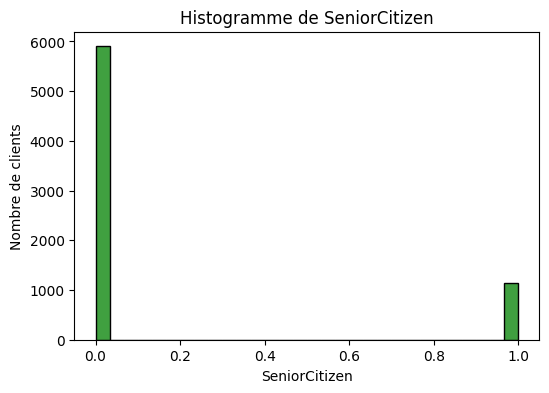

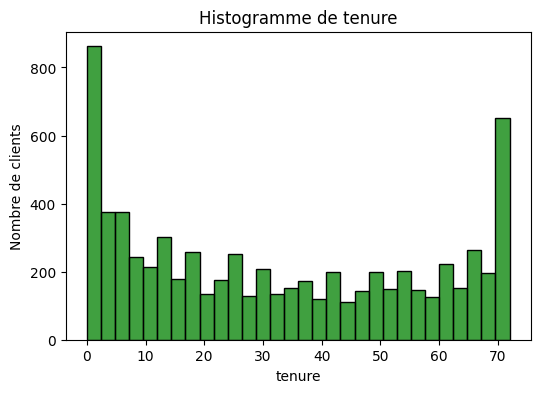

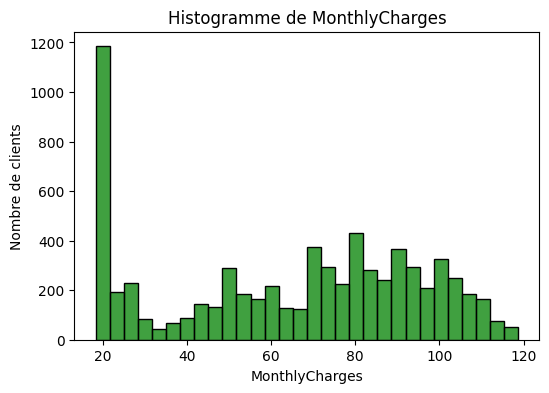

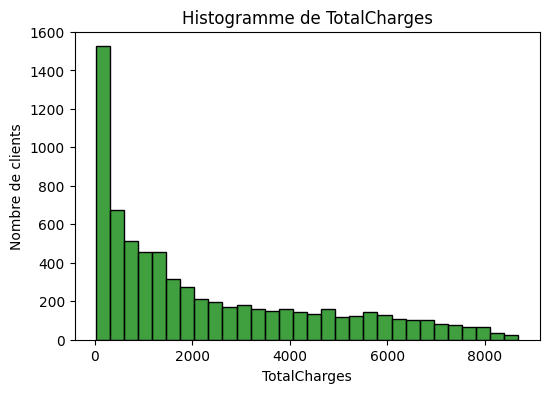

In [87]:
# Visualisations univariées :
# 1- Variables numériques
import matplotlib.pyplot as plt
import seaborn as sns
numerique_features = ['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerique_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], bins=30, kde=False, color='green')
    plt.title(f"Histogramme de {col}")
    plt.xlabel(col)
    plt.ylabel("Nombre de clients")
    plt.show()



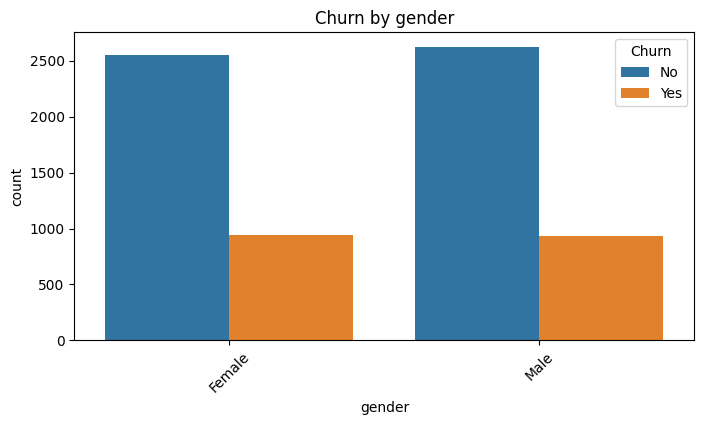

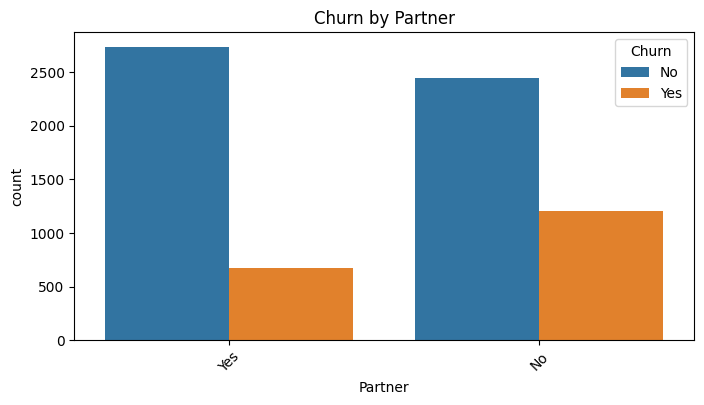

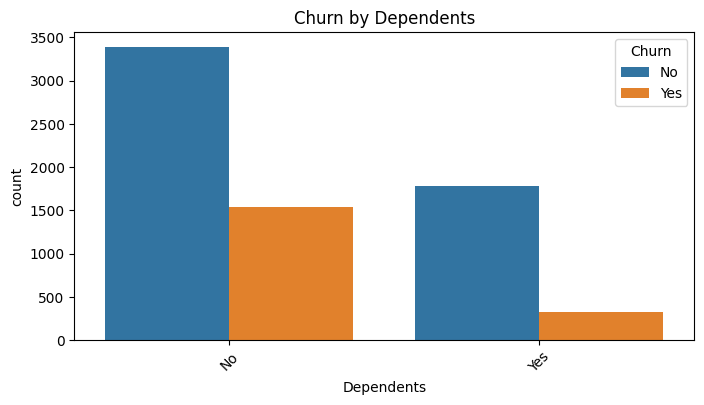

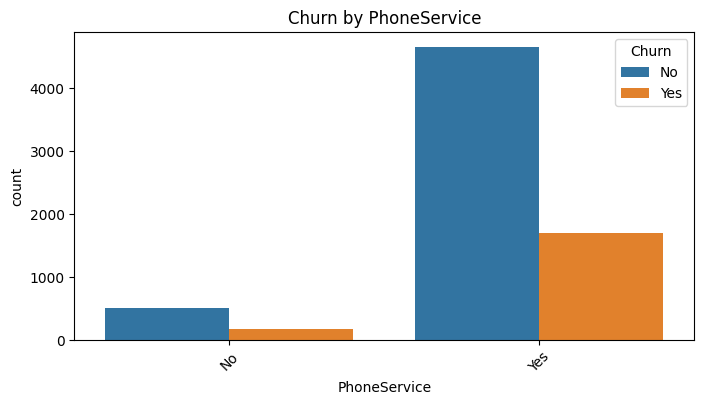

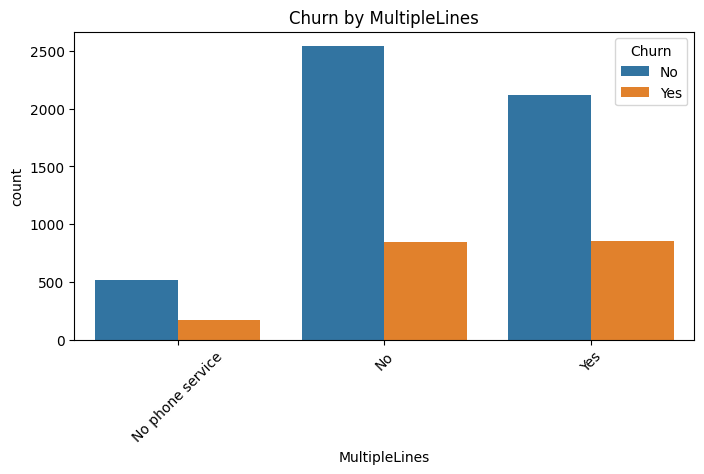

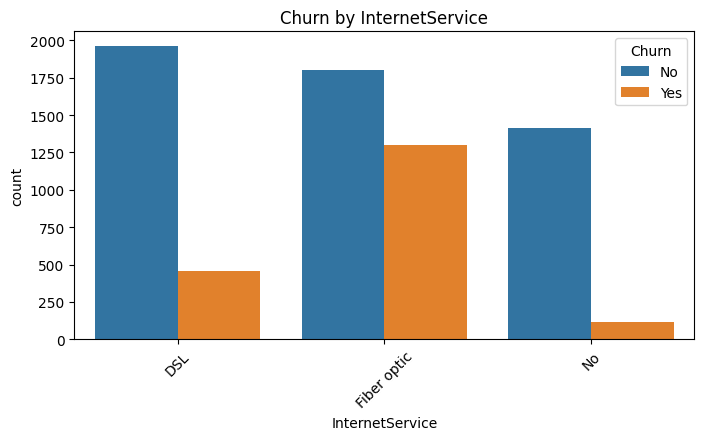

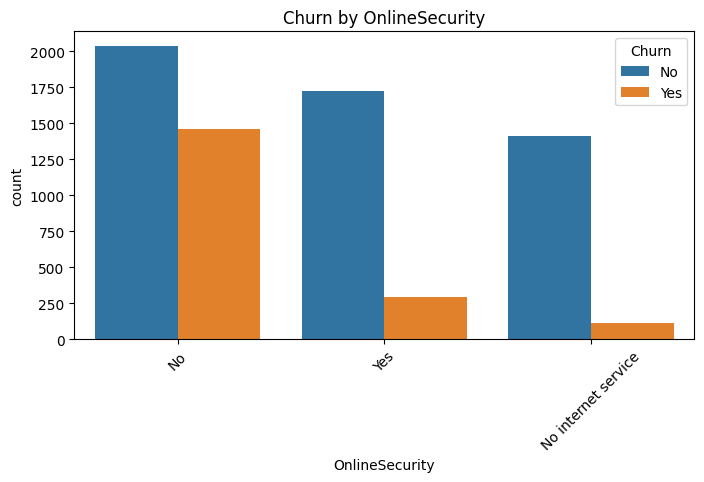

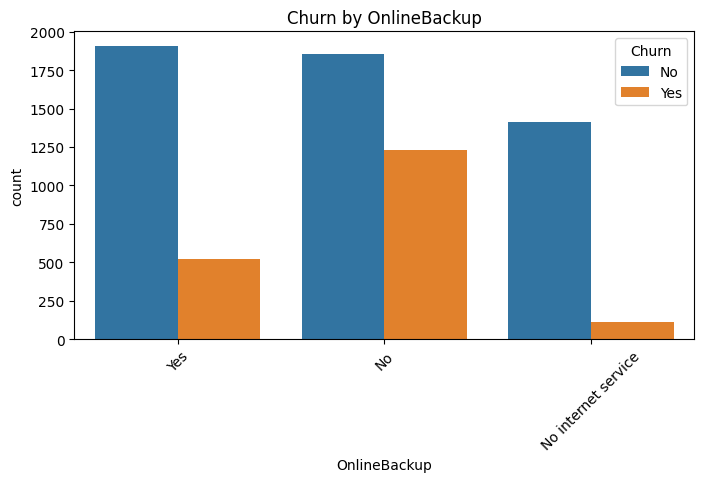

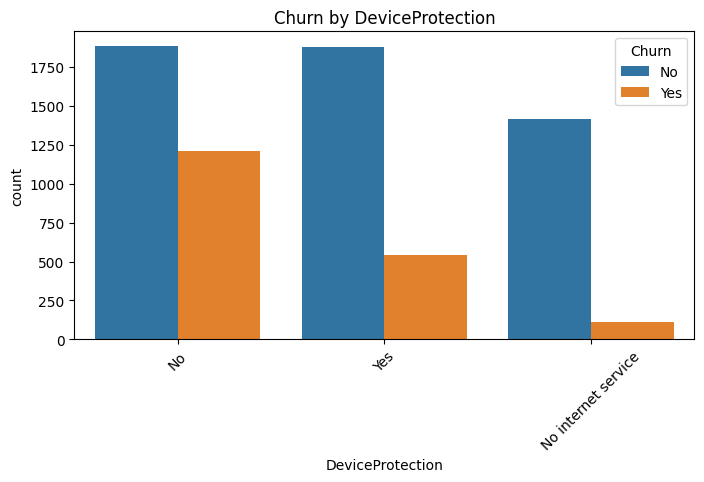

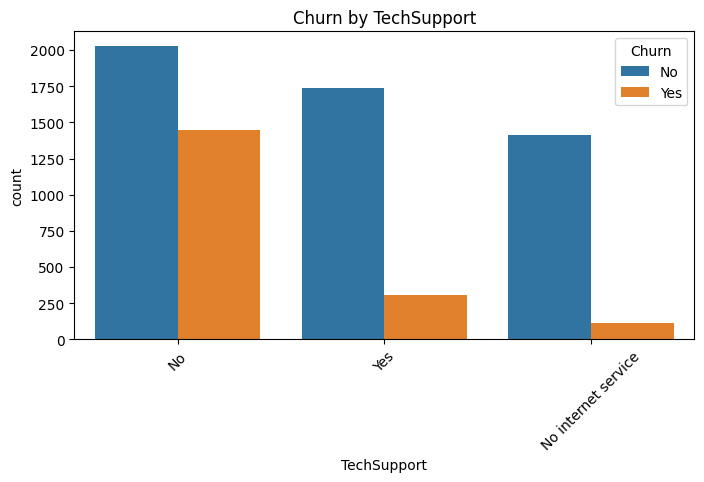

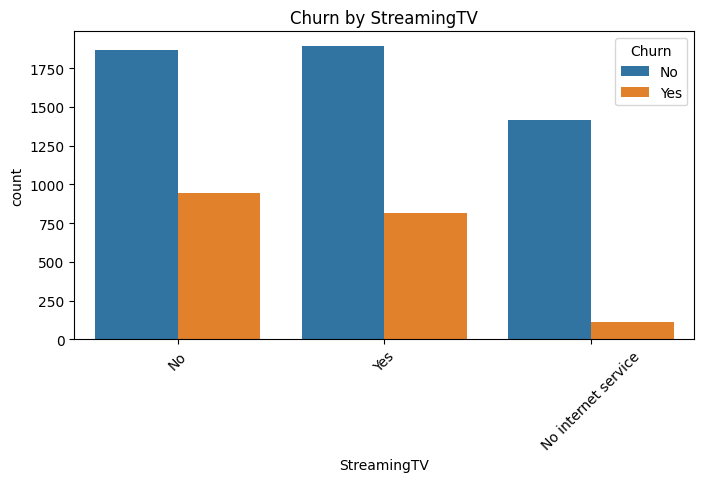

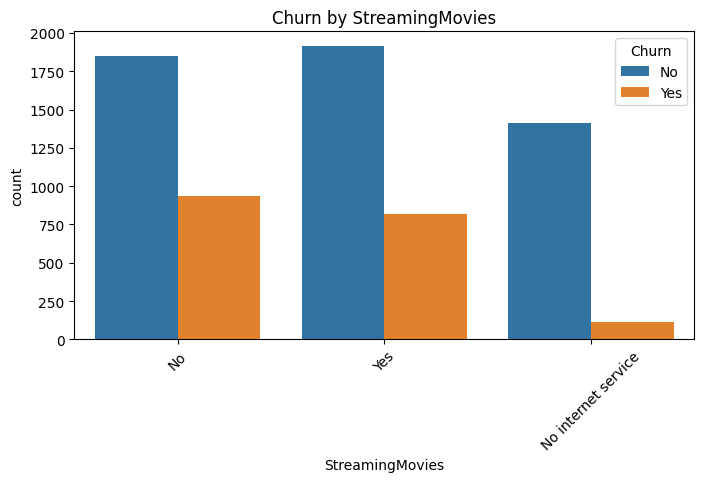

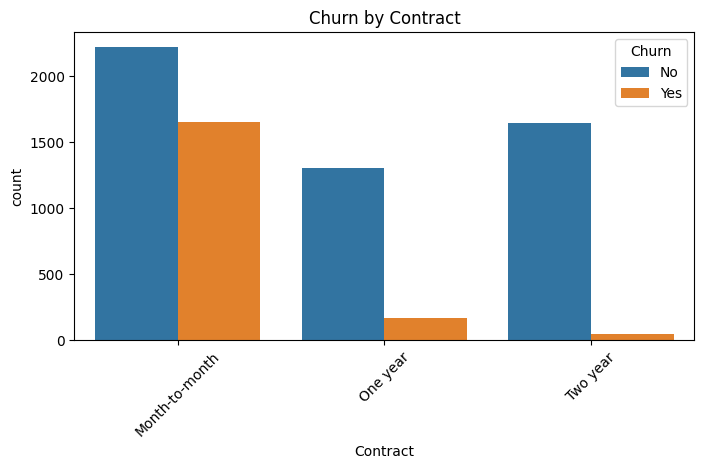

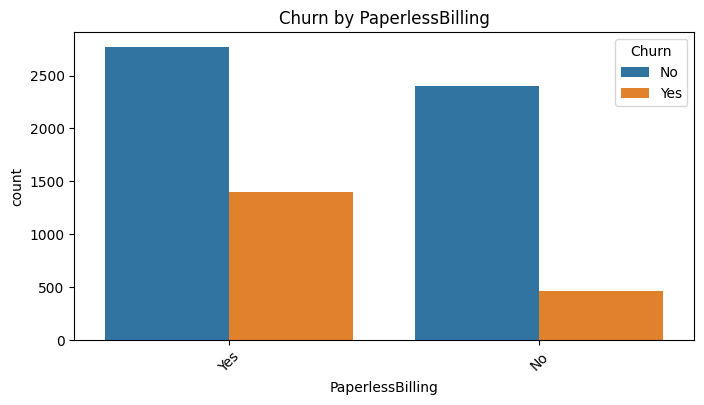

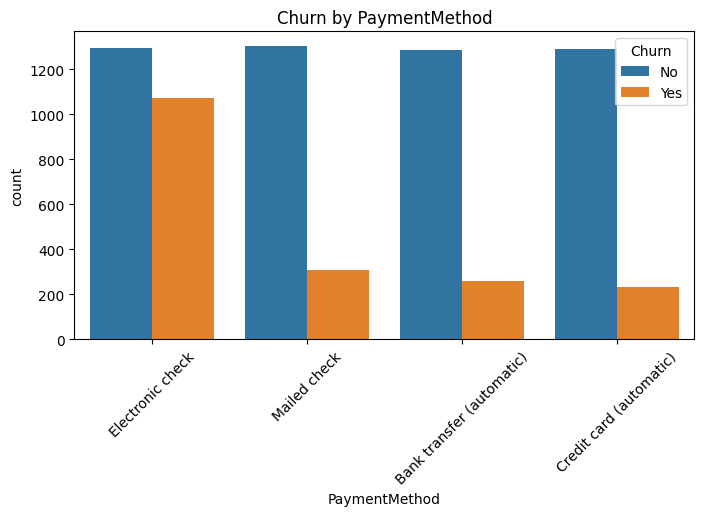

In [88]:

colonne_to_plot=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']


def count_plot_affichage(column_name):
    plt.figure(figsize=(8,4))
    sns.countplot(x=column_name, data=data, hue='Churn')
    plt.title(f"Churn by {column_name}")
    plt.xticks(rotation=45)
    plt.show()

for col in colonne_to_plot:
    count_plot_affichage(col)

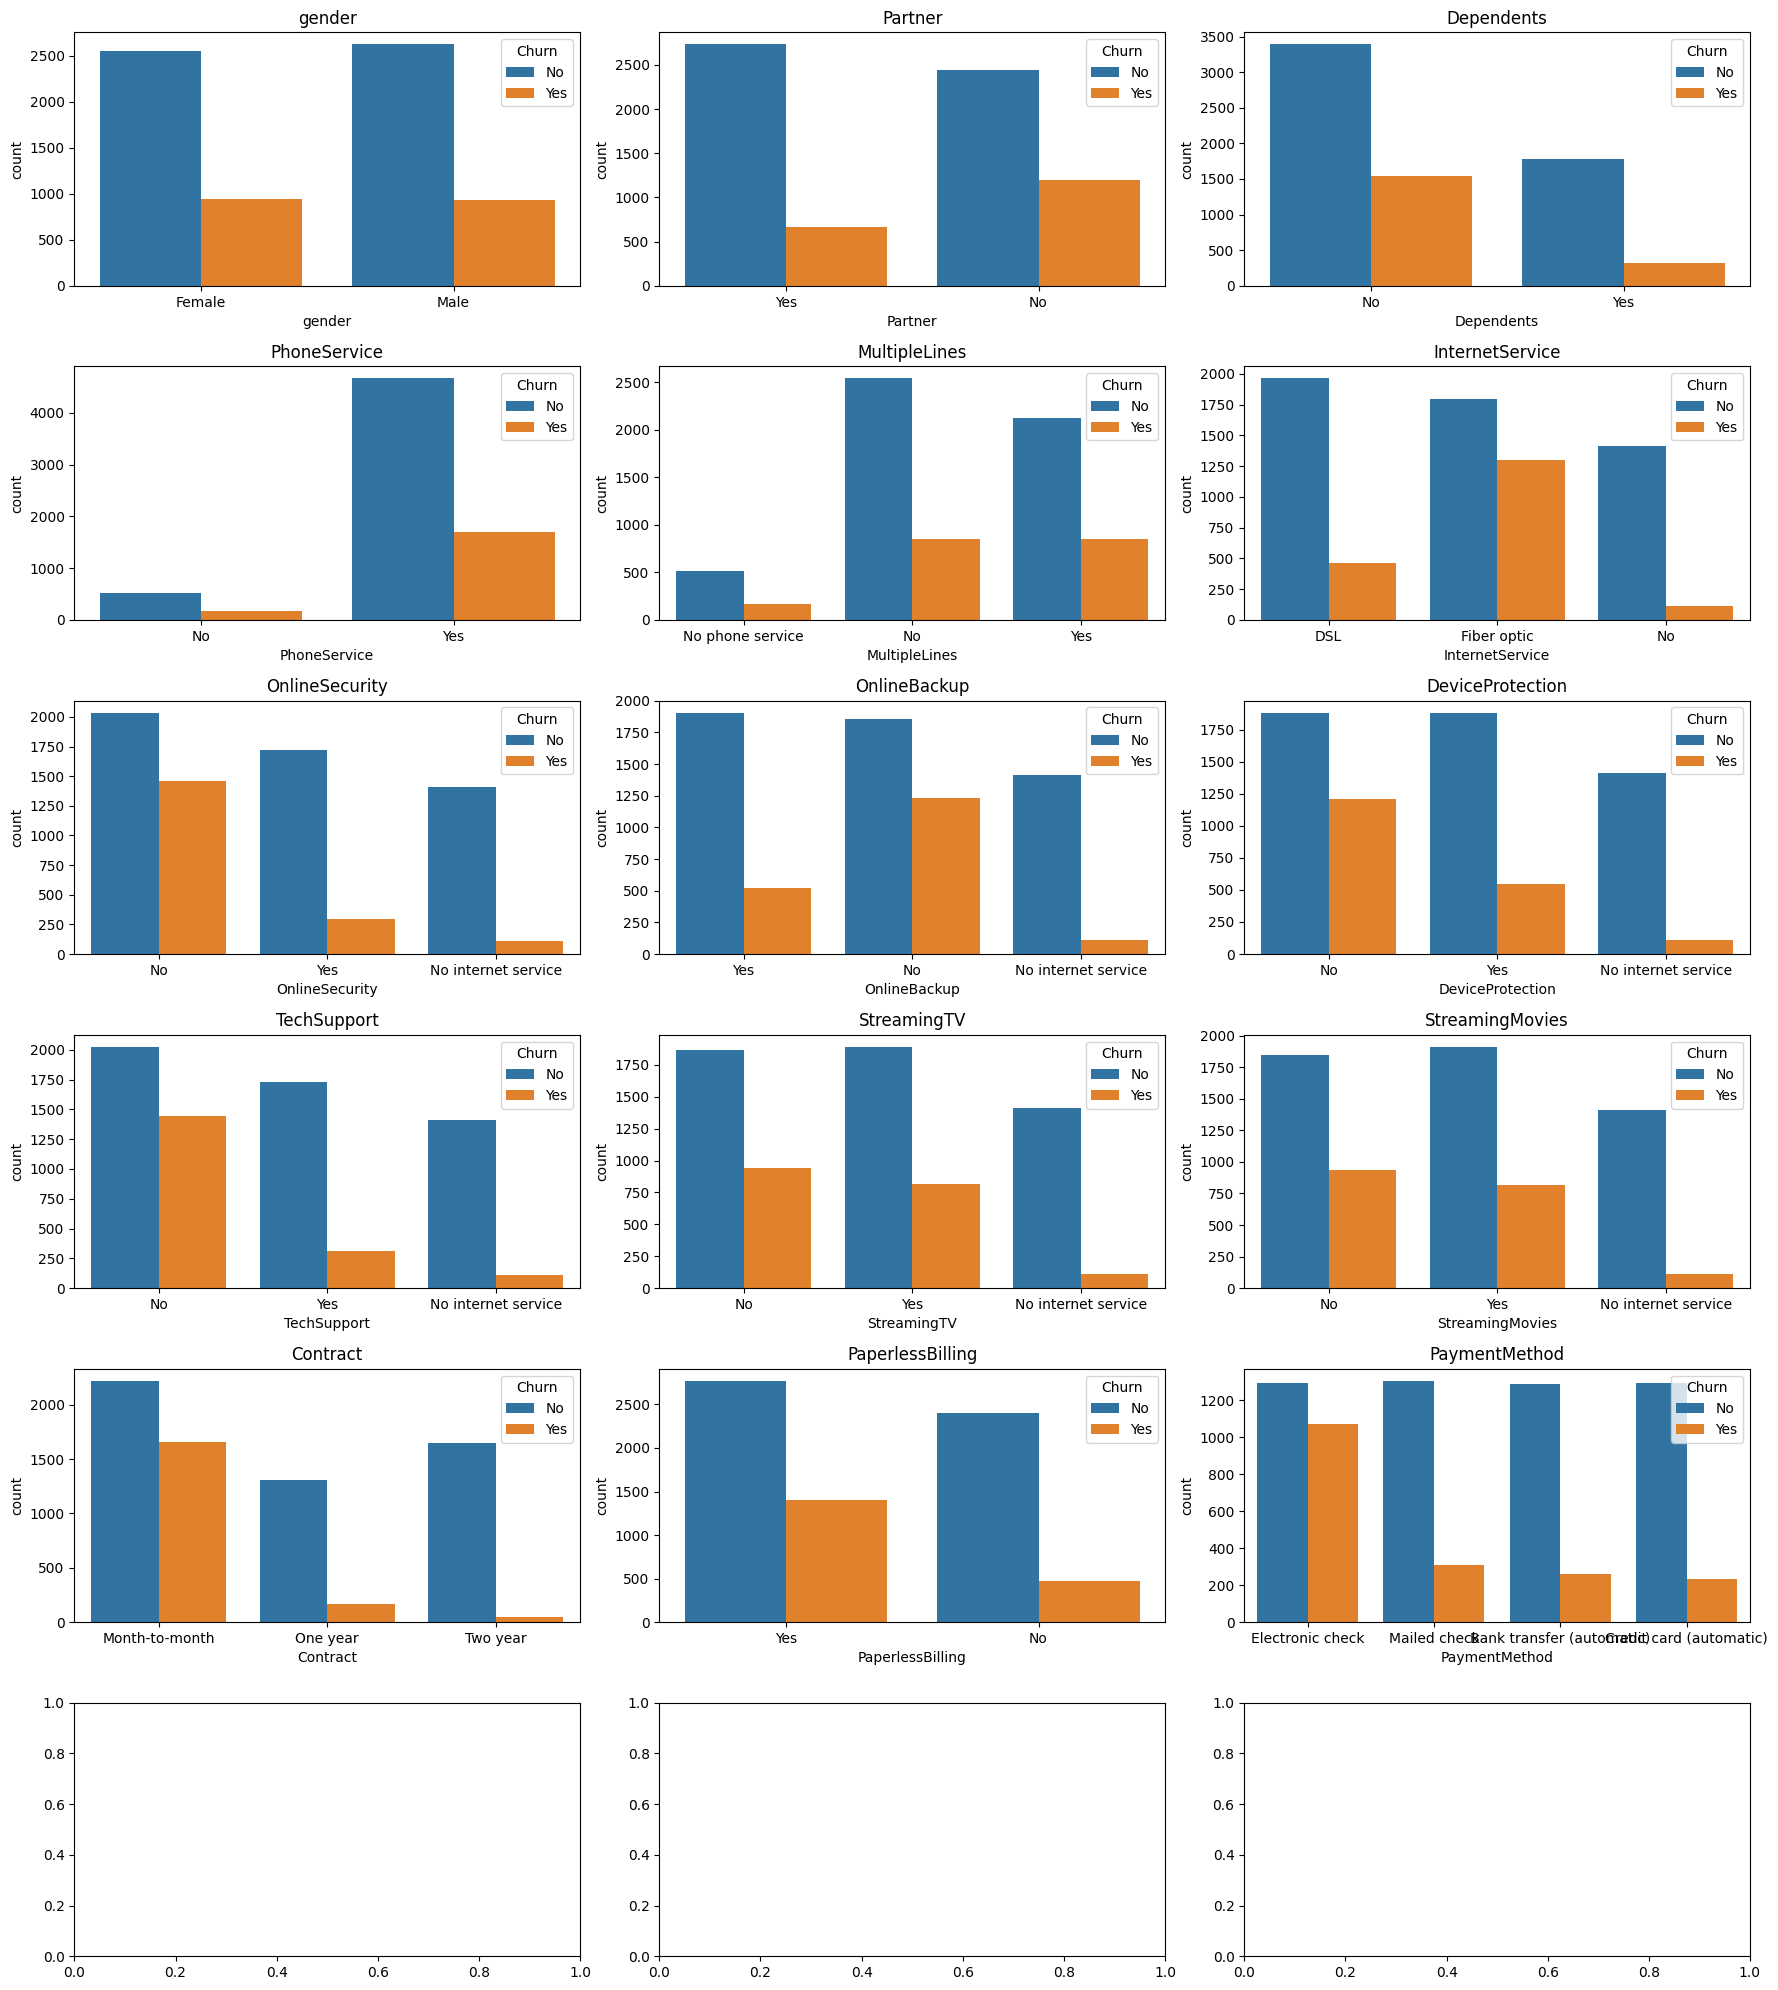

In [89]:

colonne_to_plot = ['gender','Partner','Dependents','PhoneService','MultipleLines',
                   'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                   'TechSupport','StreamingTV','StreamingMovies','Contract',
                   'PaperlessBilling','PaymentMethod']

n_cols = len(colonne_to_plot)  # toutes les colonnes sur 1 ligne
fig, axes = plt.subplots(6,3, figsize=(18, 20))  # 1 ligne, n_cols colonnes
axes = axes.flatten()  # au cas où axes n'est pas 1D

for i, col in enumerate(colonne_to_plot):
    sns.countplot(x=col, data=data, hue='Churn', ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig("count_polt.png", dpi=300)
plt.show()

In [ ]:


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['Churn'] = encoder.fit_transform(data["Churn"])
data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


<!-- transformer Totalcharges en 1 et 2 -->

In [91]:


# # J'ai changer le Non et Yes to 1 et 0  de Churn pour faire la coreelation

<!-- Convertir les variables categoriales en numérique -->
pour faire la correlation  : on ana des variables binaires (yes/NO), (male/female)

In [92]:

numeric_cols = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Churn']

for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce') 
    corr_matrix = data.corr(numeric_only=True)

data[numeric_cols] = data[numeric_cols].fillna(0)
corr_matrix = data[numeric_cols].corr()
print(corr_matrix)


                SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
SeniorCitizen        1.000000  0.016567        0.220173      0.102395   
tenure               0.016567  1.000000        0.247900      0.824757   
MonthlyCharges       0.220173  0.247900        1.000000      0.650468   
TotalCharges         0.102395  0.824757        0.650468      1.000000   
Churn                0.150889 -0.352229        0.193356     -0.199428   

                   Churn  
SeniorCitizen   0.150889  
tenure         -0.352229  
MonthlyCharges  0.193356  
TotalCharges   -0.199428  
Churn           1.000000  


<!-- La matrice de correlation  -->

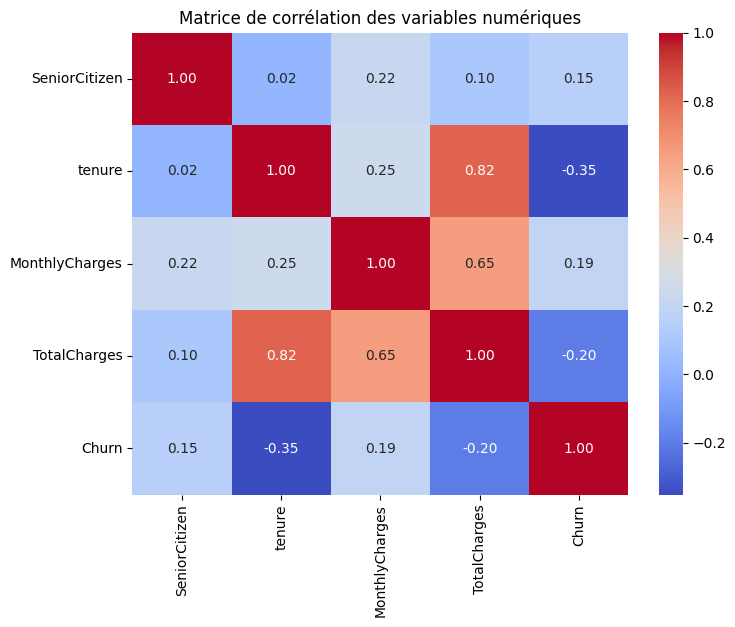

In [104]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation des variables numériques")
plt.savefig("matrice_correlation.png", dpi=300)
plt.show()

In [94]:
from sklearn.preprocessing import LabelEncoder
# Liste des colonnes catégorielles

columns_to_encode = ['Dependents', 'PhoneService', 'MultipleLines', 
                     'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                     'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                     'PaperlessBilling', 'PaymentMethod']
for col in columns_to_encode: 
    encoder=LabelEncoder()
    data[col] = encoder.fit_transform(data[col])
    print(f"Colonne encodée: {col}")
    print(data[col].value_counts())
    print("-" * 50)



Colonne encodée: Dependents
Dependents
0    4933
1    2110
Name: count, dtype: int64
--------------------------------------------------
Colonne encodée: PhoneService
PhoneService
1    6361
0     682
Name: count, dtype: int64
--------------------------------------------------
Colonne encodée: MultipleLines
MultipleLines
0    3390
2    2971
1     682
Name: count, dtype: int64
--------------------------------------------------
Colonne encodée: InternetService
InternetService
1    3096
0    2421
2    1526
Name: count, dtype: int64
--------------------------------------------------
Colonne encodée: OnlineSecurity
OnlineSecurity
0    3498
2    2019
1    1526
Name: count, dtype: int64
--------------------------------------------------
Colonne encodée: OnlineBackup
OnlineBackup
0    3088
2    2429
1    1526
Name: count, dtype: int64
--------------------------------------------------
Colonne encodée: DeviceProtection
DeviceProtection
0    3095
2    2422
1    1526
Name: count, dtype: int64
-----

In [ ]:
# Liste des colonnes numérique

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
print(data[data['TotalCharges'].isna()])
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)
data
print(data['TotalCharges'].isna().sum())
print(data['Churn'].isna().sum())


In [ ]:
# print(data.dtypes)
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns= [col for col in numeric_cols if col not in ['SeniorCitizen', 'Churn']]

print("Colonnes numériques après exclusion de 'Churn' et 'SeniorCitizen' :", numeric_columns)
# Fusionner les colonnes numériques et encodées :
final_data = pd.concat([data[numeric_columns], data[columns_to_encode]], axis=1)
print(final_data.head())


In [ ]:
# Separation de les variables x et y :

X=final_data.copy()
Y=data['Churn']
print("Shape de X :", X.shape)
print("Shape de y :", Y.shape)
print("Aperçu de X :")
print(X.head())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.2, random_state=42)
print("Taille de X_train :", X_train.shape)
print("Taille de X_test :", X_test.shape)
print("Taille de Y_train:",Y_train.shape)
print("Taille de Y prediction :", Y_test.shape)

In [143]:
# Definir le model:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score,recall_score,precision_score,f1_score
model = RandomForestClassifier(random_state=42)

model.fit(X_train, Y_train)
# Prédictions
y_pred = model.predict(X_test)
print(y_pred)
y_proba = model.predict_proba(X_test)[:,1]
print(y_proba)



[1 0 0 ... 0 0 0]
[0.9  0.08 0.07 ... 0.02 0.   0.45]


In [144]:
#  Scores de base
accuracy = accuracy_score(Y_test,y_pred)
recall =recall_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
print("Accuracy :", round(accuracy, 4))
print("Recall :", round(recall, 4))
print("Precision :", round(precision, 4))
print("F1 Score :", round(f1, 4))



Accuracy : 0.7821
Recall : 0.4638
Precision : 0.6179
F1 Score : 0.5299


In [158]:
from sklearn.linear_model import LogisticRegression
model = model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

model.fit(X_train, Y_train)
# Prédictions
y_predict= model.predict(X_test)
print(y_predict)
y_proba = model.predict_proba(X_test)[:,1]
print(y_proba)

[1 0 0 ... 0 0 1]
[0.81365168 0.17142313 0.01393714 ... 0.10630289 0.042329   0.7680517 ]


c:\Users\Latitude\Desktop\Projet_Pr-diction-du-Churn-Client\env_churn\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
